<a href="https://colab.research.google.com/github/experienciarg200-alt/Python-con-Pandas/blob/main/Actividad6FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Tarea de grupo
*   MATRÍCULA: ----------------------------------------------------

En esta actividad trabajarás con el archivo `computer_prices.csv`, basado en un conjunto de datos sobre características técnicas y especificaciones de computadoras portátiles y de escritorio, disponible en Kaggle.

Los datos fueron recopilados para analizar el rendimiento y el precio de los dispositivos, e incluyen información sobre hardware, almacenamiento, conectividad y otras especificaciones técnicas. Los indicadores incluidos son:

* `device_type`: Tipo de dispositivo (ej. laptop, desktop)
* `brand`: Marca del dispositivo
* `model`: Modelo del dispositivo
* `release_year`: Año de lanzamiento del dispositivo
* `os`: Sistema operativo instalado
* `form_factor`: Factor de forma o diseño del dispositivo (ej. laptop, ultrabook, desktop tower)
* `cpu_brand`: Marca del procesador
* `cpu_tier`: Nivel o gama del procesador, ordinal del 1 al 6 según desempeño
* `cpu_cores`: Número de núcleos del procesador
* `cpu_threads`: Número de hilos de ejecución del procesador
* `gpu_brand`: Marca de la tarjeta gráfica
* `gpu_model`: Modelo específico de la tarjeta gráfica
* `gpu_tier`: Nivel o gama de la GPU, ordinal del 1 al 6 según desempeño
* `vram_gb`: Memoria de video de la GPU en gigabytes
* `ram_gb`: Memoria RAM del dispositivo en gigabytes
* `storage_type`: Tipo de almacenamiento (ej. HDD, SSD)
* `storage_gb`: Capacidad de almacenamiento en gigabytes
* `storage_drive_count`: Número de unidades de almacenamiento instaladas
* `display_type`: Tipo de pantalla (ej. IPS, TN, OLED)
* `charger_watts`: Potencia del cargador (en watts) para laptops
* `psu_watts`: Potencia de la fuente de poder (en watts) para desktops
* `wifi`: Estándar de conectividad Wi-Fi (ej. Wi-Fi 5, 6, 6E, 7)
* `bluetooth`: Versión de Bluetooth
* `weight_kg`: Peso del dispositivo en kilogramos
* `warranty_months`: Meses de garantía del dispositivo
* `price`: Precio del dispositivo. Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [48]:
# Instalar las bibliotecas necesarias
!pip install category_encoders

In [49]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy.stats import probplot
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders.binary import BinaryEncoder

1. Descarga el archivo: `computer_prices.csv` y guarda, en un dataframe (`compu_df`), todos sus registros.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?
* Determina la cantidad de valores únicos por columna.
* Elimina las variables:
  * `model`: Debido a su altísima cardinalidad, lo que dificulta su uso en análisis y modelado.
  * `cpu_model`: Además de su elevada cardinalidad, su información ya está representada de manera implícita en otras variables como: `cpu_tier`, `cpu_cores` y `cpu_threads`

In [50]:
compu_df = pd.read_csv('computer_prices.csv')
compu_df.head()
compu_df.info()
num_cols = compu_df.select_dtypes(include=['int64', 'float64']).columns
num_count = len(num_cols)

text_cols = compu_df.select_dtypes(include=['object']).columns
text_count = len(text_cols)

print(f"Columnas numéricas: {num_count}")
print(f"Columnas de texto: {text_count}")

pd.DataFrame({
    "Valores únicos": compu_df.nunique(),
    "Tipo de dato": compu_df.dtypes
}).sort_values(by="Valores únicos", ascending=False)

compu_df = compu_df.drop(columns=["model", "cpu_model"])
compu_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   model                100000 non-null  object 
 3   release_year         100000 non-null  int64  
 4   os                   100000 non-null  object 
 5   form_factor          100000 non-null  object 
 6   cpu_brand            100000 non-null  object 
 7   cpu_model            100000 non-null  object 
 8   cpu_tier             100000 non-null  int64  
 9   cpu_cores            100000 non-null  int64  
 10  cpu_threads          100000 non-null  int64  
 11  gpu_brand            100000 non-null  object 
 12  gpu_model            100000 non-null  object 
 13  gpu_tier             100000 non-null  int64  
 14  vram_gb              100000 non-null  int64  
 15  ram_gb            

2. Antes de iniciar con el análisis univariado, verifica si hay valores duplicados y/o faltantes.
* Obtén las estadísticas descriptivas, separado las numéricas y las categóricas. De estas últimas incluye las tablas de frecuencia.
* Genera histogramas para las numéricas y diagramas de barras para las categóricas. Con alta cardinalidad, sólo incluye los 10 valores más frecuentes.

No se encontraron valores faltantes en el dataset, por lo que no fue necesario hacer la imputación de registros. No se encontraron valores faltantes en el dataset ya que la cantidad de valores nulos es 0

In [51]:
duplicados = compu_df.duplicated().sum()

print(f"Cantidad de registros duplicados: {duplicados}")
compu_df = compu_df.drop_duplicates().reset_index(drop=True)

faltantes = compu_df.isna().sum()
faltantes = faltantes[faltantes > 0].sort_values(ascending=False)

print(faltantes)
num_cols = compu_df.select_dtypes(include=['int64', 'float64'])
num_cols.describe()

compu_df.isna().sum()
compu_df.isna().sum().sum()


Cantidad de registros duplicados: 0
Series([], dtype: int64)


np.int64(0)

In [52]:
cat_cols = compu_df.select_dtypes(include="object").columns
for col in cat_cols:
    print(f"\nFrecuencia de {col}:")
    print(compu_df[col].value_counts())



Frecuencia de device_type:
device_type
Laptop     59844
Desktop    40156
Name: count, dtype: int64

Frecuencia de brand:
brand
Lenovo      15992
HP          14114
Dell        14005
Apple       11915
ASUS        10159
Acer         9925
Samsung      8066
MSI          7891
Gigabyte     4900
Razer        3033
Name: count, dtype: int64

Frecuencia de os:
os
Windows     71817
macOS       18207
Linux        6109
ChromeOS     3867
Name: count, dtype: int64

Frecuencia de form_factor:
form_factor
Mainstream     17819
Gaming         16876
ATX            15597
Ultrabook      13236
Micro-ATX       8672
Full-Tower      7110
2-in-1          7049
SFF             5585
Workstation     4864
Mini-ITX        3192
Name: count, dtype: int64

Frecuencia de cpu_brand:
cpu_brand
Intel    52774
AMD      35311
Apple    11915
Name: count, dtype: int64

Frecuencia de gpu_brand:
gpu_brand
NVIDIA    54712
Apple     18922
AMD       15767
Intel     10599
Name: count, dtype: int64

Frecuencia de gpu_model:
gpu_model
A

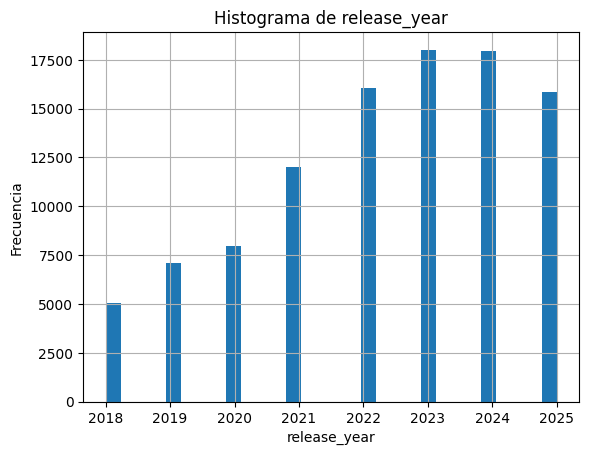

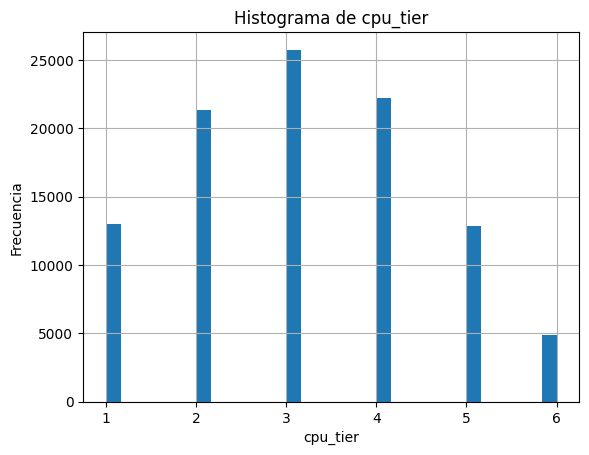

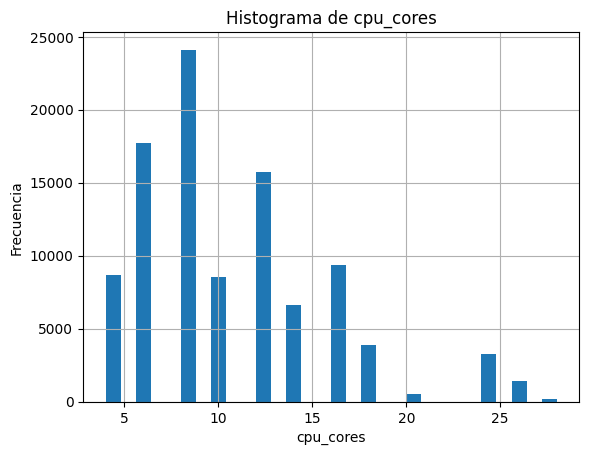

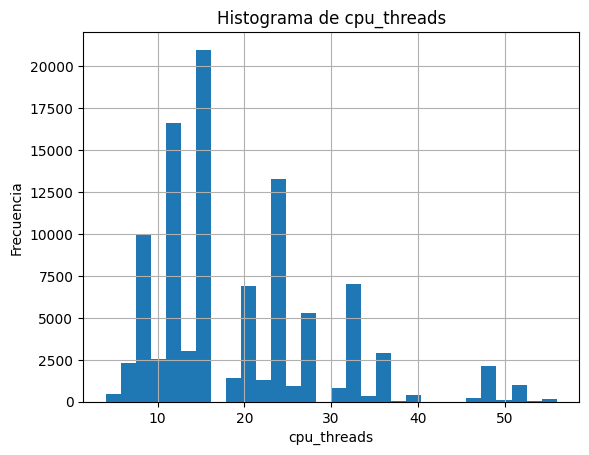

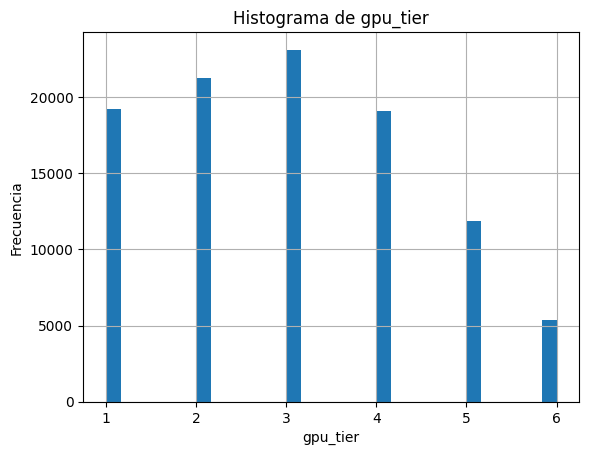

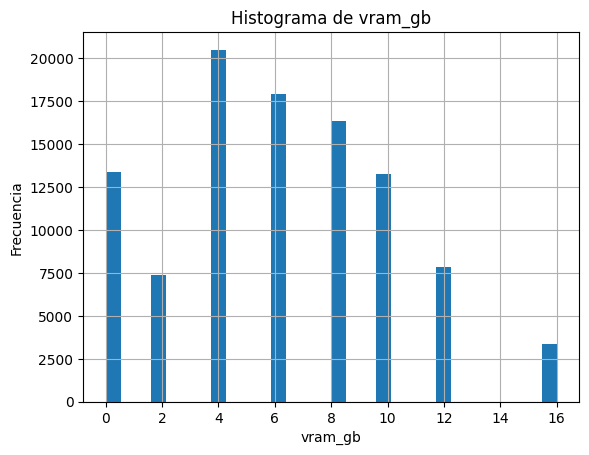

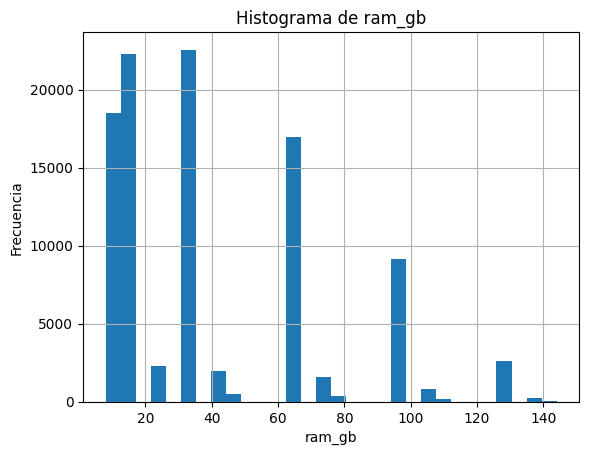

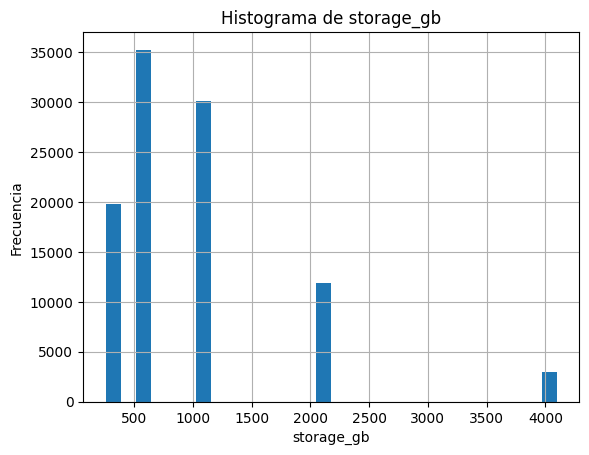

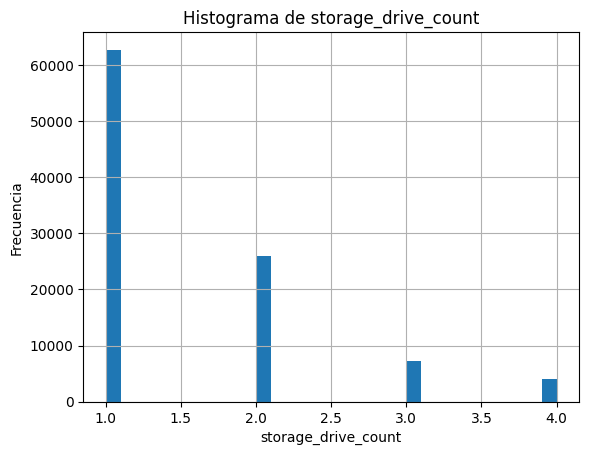

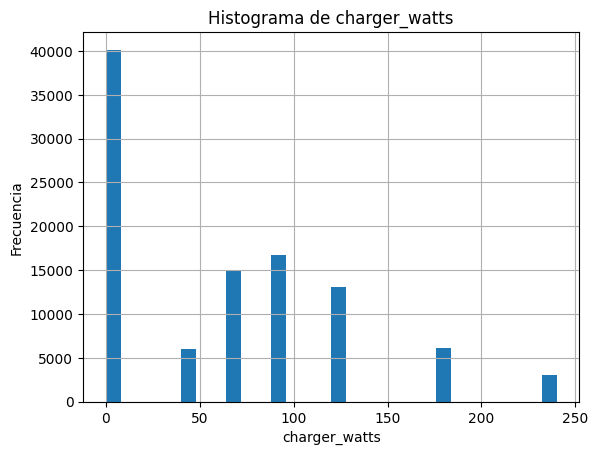

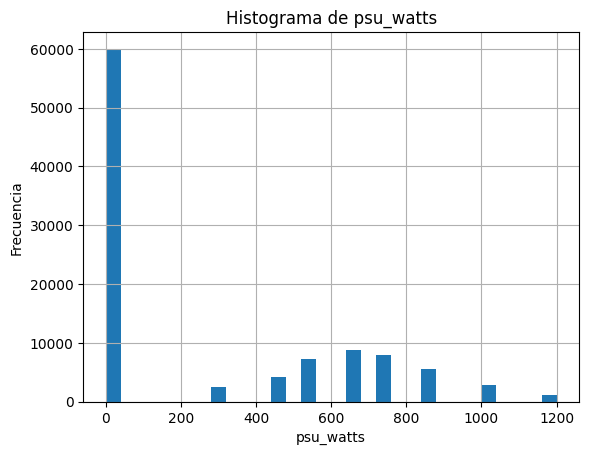

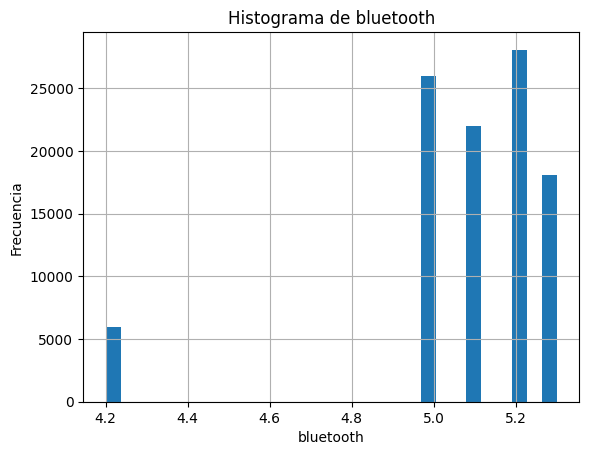

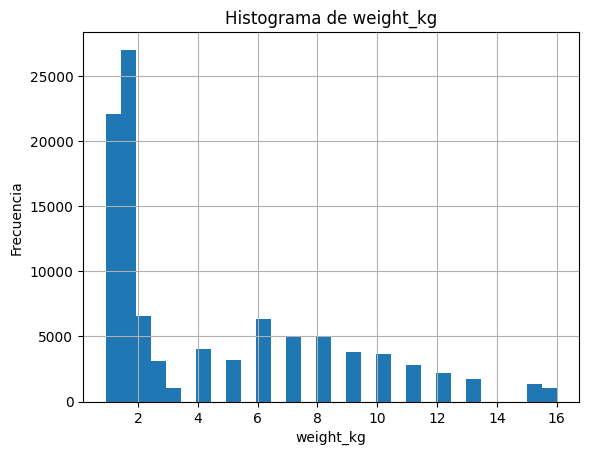

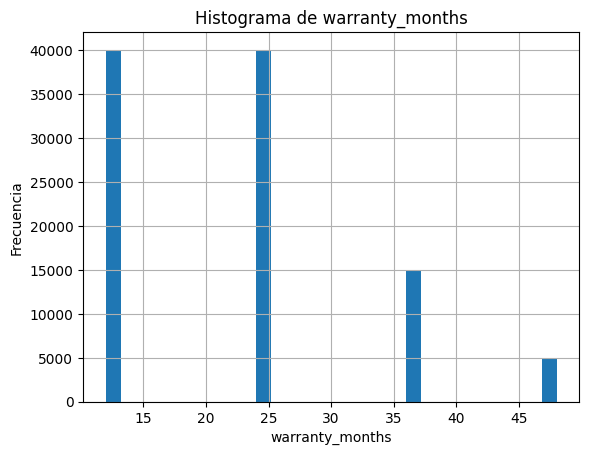

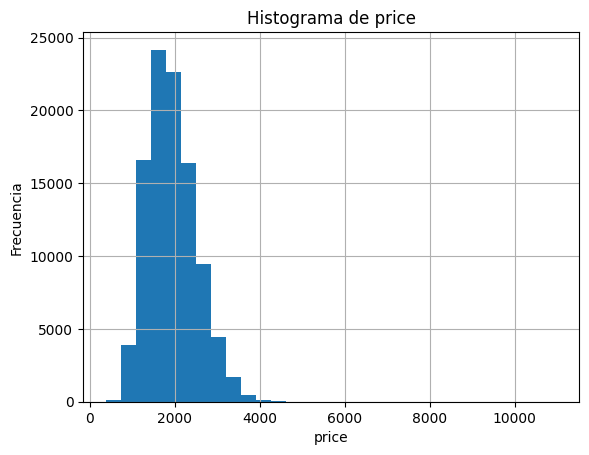

In [53]:
for col in num_cols.columns:
    plt.figure()
    compu_df[col].hist(bins=30)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

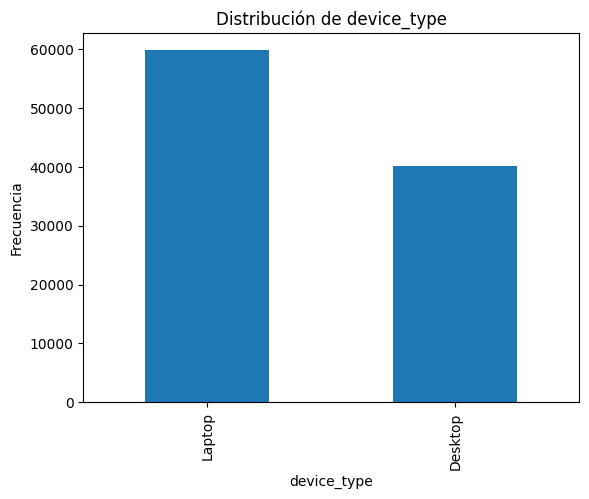

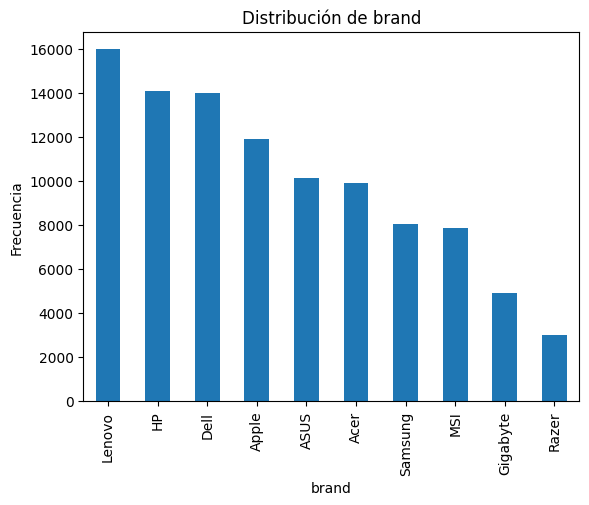

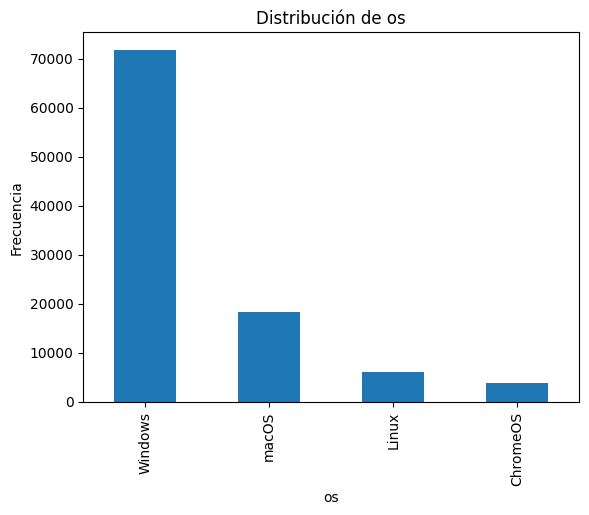

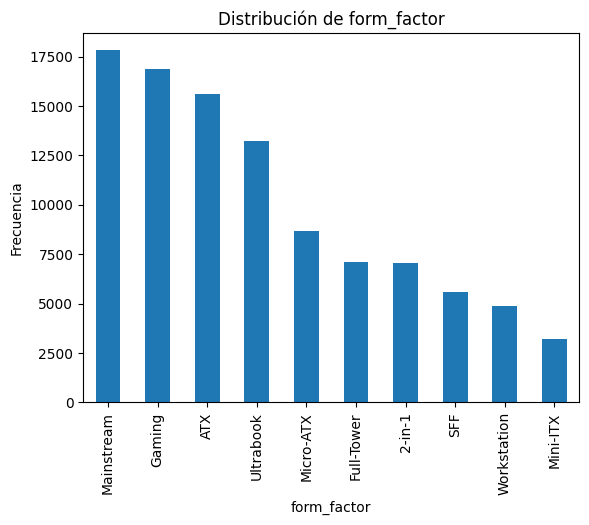

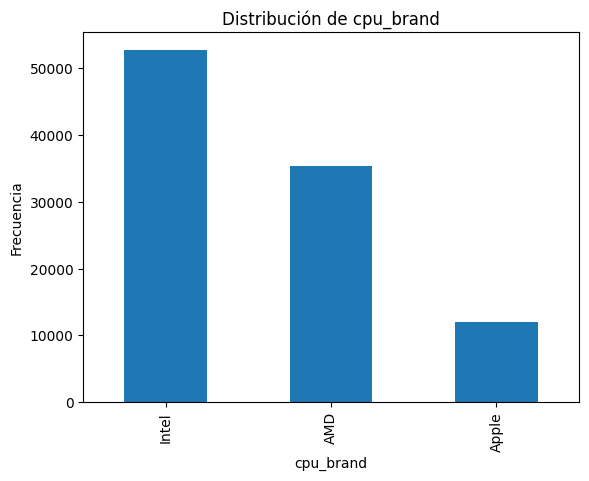

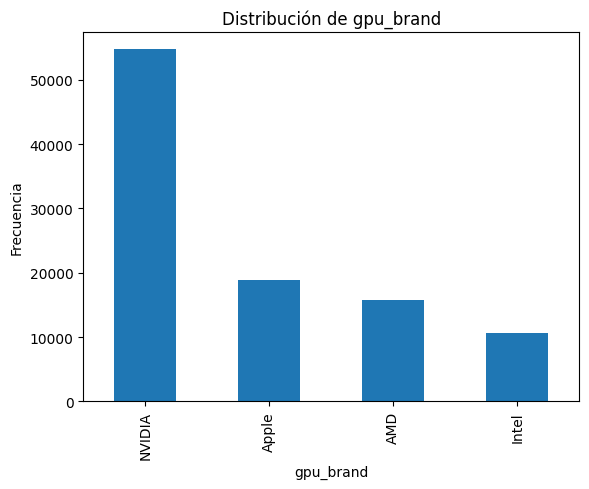

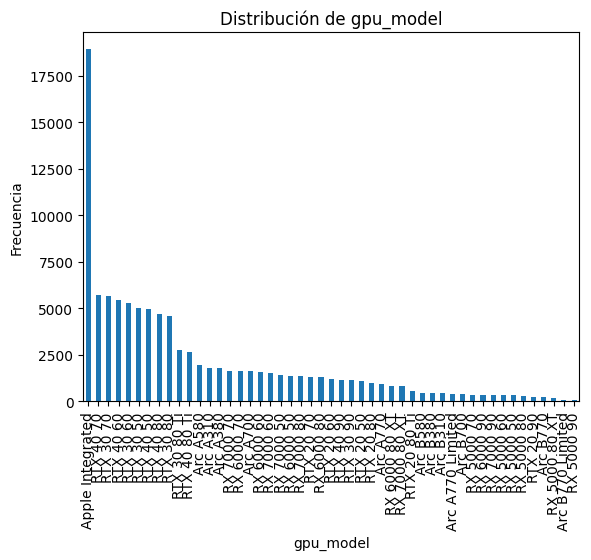

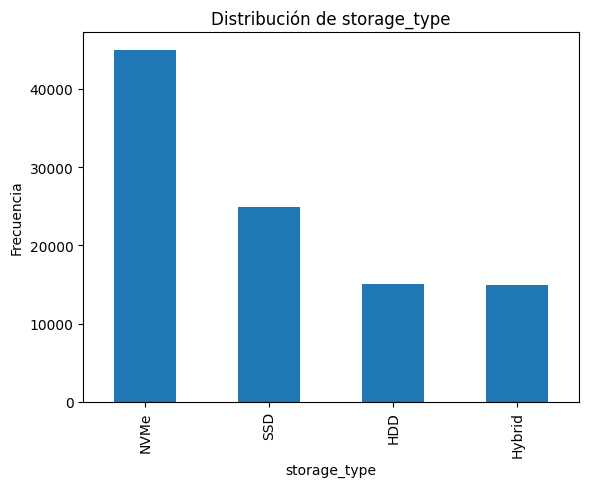

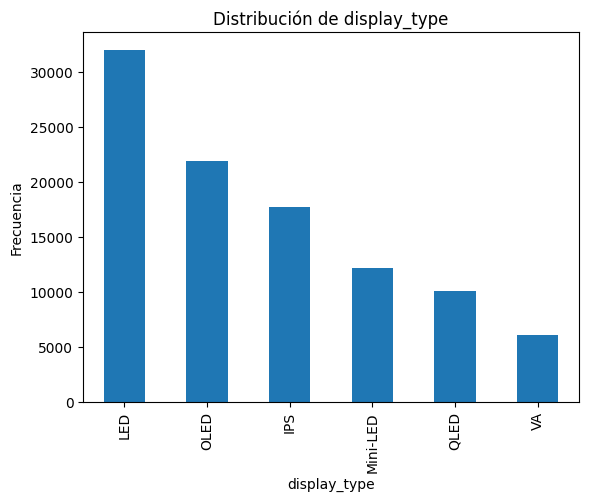

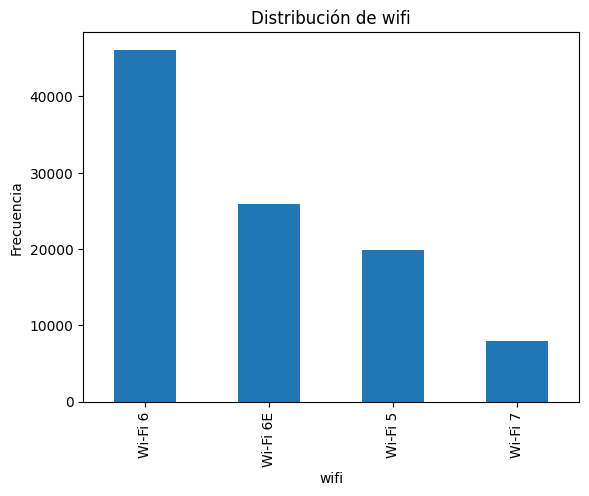

In [54]:
cat_cols = compu_df.select_dtypes(include="object").columns
for col in cat_cols:
    plt.figure()
    compu_df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribución de {col}")
    plt.ylabel("Frecuencia")
    plt.show()

3. Dibuja un mapa de calor con la matriz de correlación para las variables numéricas del conjunto de datos.
* Identifica los pares de variables cuya correlación sea superior a 0.9 e imprímelos.
* Reflexiona sobre cuáles variables representan de manera general la capacidad del hardware y mantenlas; elimina las demás por aportar información redundante.
* Incluye una breve justificación de tus decisiones.

Después de la eliminación de la variable cpu_cores se recalculó la martíz de correlación.
Entre ram_gb y gpu_tier se identificó unicamente la correlación mayor a 0.9 que es 0.91
Ambas dimensiones representan distintos valores de Hardware, gpu_tier representa la cantidad gráfica del dispositivo, mientras que ram_gb mide la memoria principal del sistema. Por lo tanto, no se consideran redundantes por lo que se decidió conserva a ambas.
En concreto, el conjunto de datos no representa multicolinealidad estructural importante despues de eliminar cpu_cores.

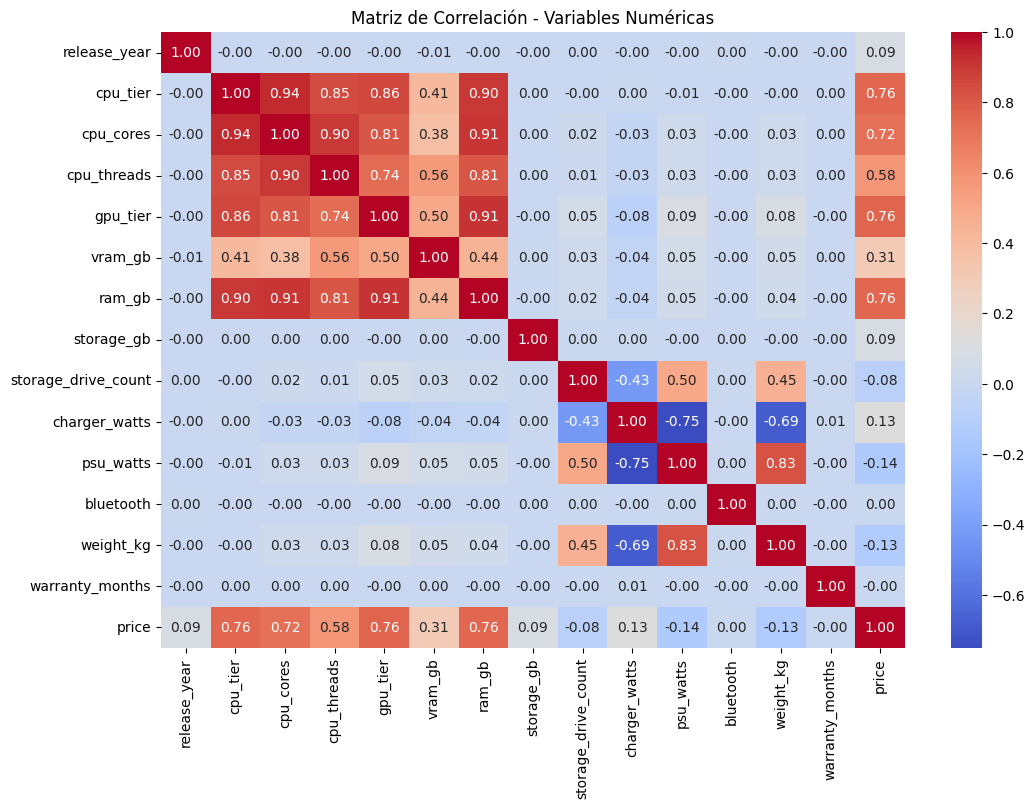

In [55]:
num_df = compu_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()

In [56]:
high_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            high_corr.append((col1, col2, corr_value))

for pair in high_corr:
    print(f"{pair[0]} y {pair[1]} -> correlación: {pair[2]:.2f}")

cpu_cores y cpu_tier -> correlación: 0.94
ram_gb y cpu_cores -> correlación: 0.91
ram_gb y gpu_tier -> correlación: 0.91


In [57]:
num_df = compu_df.select_dtypes(include='number')
corr_matrix = num_df.corr()

corr_matrix

,release_year,cpu_tier,cpu_cores,cpu_threads,gpu_tier,vram_gb,ram_gb,storage_gb,storage_drive_count,charger_watts,psu_watts,bluetooth,weight_kg,warranty_months,price
release_year,1.000000,-0.003788,-0.002468,-0.003357,-0.002626,-0.005210,-0.002416,-0.003399,0.000310,-0.000639,-0.001268,0.002489,-0.000905,-0.004031,0.089721
cpu_tier,-0.003788,1.000000,0.937376,0.848197,0.857225,0.409049,0.899349,0.001006,-0.004603,0.003966,-0.005501,-0.001991,-0.004079,0.000008,0.759196
cpu_cores,-0.002468,0.937376,1.000000,0.898171,0.812393,0.380896,0.906770,0.001004,0.016125,-0.028873,0.032949,-0.000568,0.030376,0.000015,0.720464
cpu_threads,-0.003357,0.848197,0.898171,1.000000,0.735096,0.556134,0.813155,0.000832,0.014963,-0.027150,0.031746,-0.002445,0.029261,0.000063,0.577503
gpu_tier,-0.002626,0.857225,0.812393,0.735096,1.000000,0.498624,0.912918,-0.003123,0.051215,-0.078105,0.090594,-0.000242,0.083700,-0.002593,0.762875
vram_gb,-0.005210,0.409049,0.380896,0.556134,0.498624,1.000000,0.441475,0.003355,0.030479,-0.044648,0.050708,-0.001494,0.046039,0.001302,0.305017
ram_gb,-0.002416,0.899349,0.906770,0.813155,0.912918,0.441475,1.000000,-0.001190,0.023607,-0.039456,0.045059,-0.000578,0.042133,-0.002225,0.758654
storage_gb,-0.003399,0.001006,0.001004,0.000832,-0.003123,0.003355,-0.001190,1.000000,0.001392,0.002160,-0.004137,0.000408,-0.004279,-0.004392,0.088937
storage_drive_count,0.000310,-0.004603,0.016125,0.014963,0.051215,0.030479,0.023607,0.001392,1.000000,-0.426559,0.500057,0.002185,0.454040,-0.003646,-0.082437
charger_watts,-0.000639,0.003966,-0.028873,-0.027150,-0.078105,-0.044648,-0.039456,0.002160,-0.426559,1.000000,-0.751078,-0.001489,-0.686176,0.005589,0.126309


In [58]:
high_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            high_corr.append((col1, col2, corr_value))

for pair in high_corr:
    print(f"{pair[0]} y {pair[1]} -> correlación: {pair[2]:.2f}")

cpu_cores y cpu_tier -> correlación: 0.94
ram_gb y cpu_cores -> correlación: 0.91
ram_gb y gpu_tier -> correlación: 0.91


4. Para comenzar con la ingeniería de características, crea una copia del dataframe y asígnala a un nuevo objeto llamado `compu_trans`.
* Calcula cuántos años han pasado desde el lanzamiento de cada computadora y almacénalo en una nueva columna llamada `years_since_release`; luego, elimina la columna original.
* Utiliza `KBinsDiscretizer` para reemplazar la columna `vram_gb` en 4 bins ordinales basados en cuantiles.
* Imprime los valores que delimitan cada bin y haz un histograma para ver la cantidad de observaciones en cada uno, con el fin de entender cómo se agruparon los datos.

In [59]:
compu_trans = compu_df.copy()

from datetime import datetime
current_year = datetime.now().year

compu_trans["years_since_release"] = current_year - compu_trans["release_year"]
compu_trans.drop(columns="release_year", inplace=True)
compu_trans.head()


,device_type,brand,os,form_factor,cpu_brand,cpu_tier,cpu_cores,cpu_threads,gpu_brand,gpu_model,...,storage_drive_count,display_type,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price,years_since_release
0,Desktop,Samsung,Windows,ATX,Intel,3,12,24,NVIDIA,RTX 40 60,...,1,LED,0,750,Wi-Fi 6,5.1,11.00,36,1383.99,4
1,Laptop,Samsung,Windows,Mainstream,Intel,4,12,24,NVIDIA,RTX 40 80,...,1,OLED,120,0,Wi-Fi 6,5.3,2.03,12,2274.99,4
2,Desktop,Lenovo,macOS,SFF,AMD,2,8,16,NVIDIA,RTX 40 50,...,2,LED,0,850,Wi-Fi 6,5.0,7.00,24,1879.99,2
3,Desktop,Dell,Windows,ATX,AMD,2,6,12,AMD,RX 7000 60,...,2,IPS,0,650,Wi-Fi 6,5.2,6.00,36,1331.99,2
4,Laptop,Gigabyte,Linux,Gaming,AMD,5,16,32,NVIDIA,RTX 30 80 Ti,...,1,Mini-LED,90,0,Wi-Fi 6,5.2,1.50,12,2681.99,2


In [60]:
compu_trans = compu_df.copy()
from datetime import datetime

current_year = datetime.now().year
compu_trans["years_since_release"] = current_year - compu_trans["release_year"]
compu_trans.drop(columns="release_year", inplace=True)
from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(
    n_bins=4,
    encode="ordinal",
    strategy="quantile"
)

compu_trans["vram_gb"] = kbins.fit_transform(
    compu_trans[["vram_gb"]]
)
bin_edges = kbins.bin_edges_[0]
print("Límites de los bins:")
print(bin_edges)

Límites de los bins:
[ 0.  4.  6.  8. 16.]


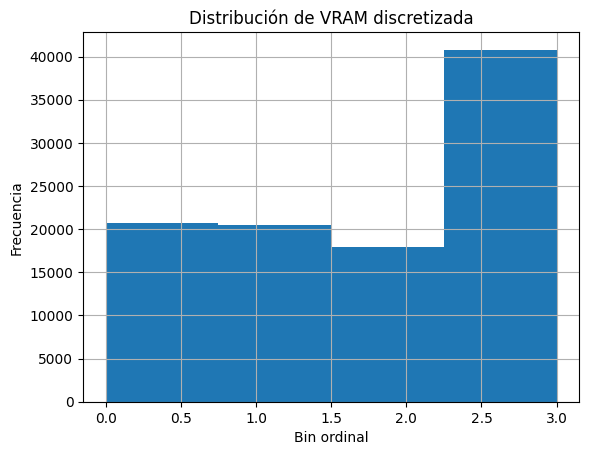

In [61]:
plt.figure()
compu_trans["vram_gb"].hist(bins=4)
plt.title("Distribución de VRAM discretizada")
plt.xlabel("Bin ordinal")
plt.ylabel("Frecuencia")
plt.show()

5. Observa los histogramas del ejercicio 2. Notarás que en las variables `charger_watts` y `psu_watts` aparece una barra en 0. Analiza por qué ocurre esto y qué significa en relación con el tipo de dispositivo.
* Como estas variables son mutuamente excluyentes, combínalas en una nueva columna llamada `power_watts` que contenga la potencia correspondiente de cada dispositivo y, a continuación, haz un histograma para verificar que la distribución resultante es bimodal.
* Por último, borra las columnas originales `charger_watts` y `psu_watts`.

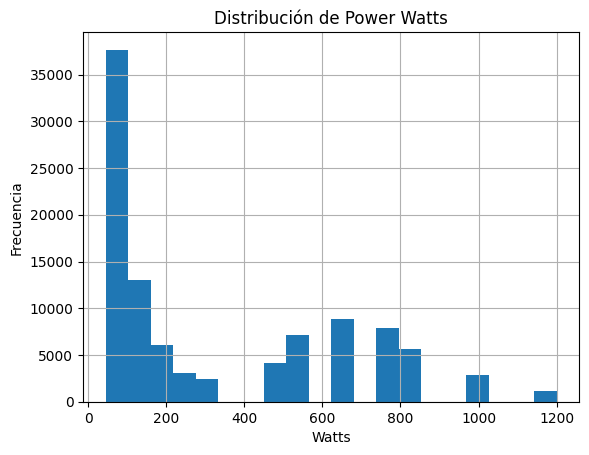

In [62]:
compu_trans = compu_df.copy()

compu_trans["power_watts"] = (
    compu_trans["charger_watts"] + compu_trans["psu_watts"]
)

plt.figure()
compu_trans["power_watts"].hist(bins=20)
plt.title("Distribución de Power Watts")
plt.xlabel("Watts")
plt.ylabel("Frecuencia")
plt.show()

compu_trans.drop(
    columns=["charger_watts", "psu_watts"],
    inplace=True
)

In [63]:
compu_trans.drop(
    columns=["charger_watts", "psu_watts"],
    inplace=True,
    errors="ignore"
)
print("charger_watts" in compu_trans.columns)
print("psu_watts" in compu_trans.columns)

False
False


6. Para disminuir el sesgo de la variable `price`, crea tres transformadores: logaritmo, raíz cuadrada y Box - Cox.
* Aplica cada transformador a la variable price, dejando el resultado en variables temporales. El objetivo es comparar los efectos de cada transformación antes de decidir cuál aplicar de manera definitiva sobre las variables continuas del dataframe.
* De la variable original y de cada una de las tres transformaciones se debe mostrar:
  * Histograma: para observar la distribución de los datos.
  * Boxplot: para identificar posibles valores atípicos.
  * Q-Q plot: para evaluar la normalidad de la variable.
  * Skew (sesgo): para cuantificar la asimetría de la distribución.
  * Cantidad de outliers: para conocer cuántos valores extremos existen.
* En función de los resultados obtenidos al comparar las transformaciones, decide cuál logró el mejor efecto sobre la distribución de la variable y aplícala directamente en el dataframe, reemplazando las variables continuas: `weight_kg`, `power_watts` y `price`.

La variable original presentaba asimetría positiva moderada alta. La raíz cuadrada redujo prcialmente el sesgo. El logaritmo redujo parcialmente la simetría. La variable price pasó de un coeficiente de simetría de 0.99 a -0.13 logrando una distribución practicamente simetrica. Por eso es la transformación más cercana a la normalidad. Por eso, se decidió aplicar la transformación logarítmica y reemplazar las variables normales en el dataframe.

/// La variable power_watts no existe en el dataframe. En su lugar está: psu_watts.

In [64]:
from scipy import stats

price_original = compu_df["price"]
price_log = np.log(price_original)
price_sqrt = np.sqrt(price_original)
price_boxcox, lambda_boxcox = stats.boxcox(price_original)

print(price_log.head())
print("Lambda óptimo Box-Cox:", lambda_boxcox)


0    7.232726
1    7.729731
2    7.539022
3    7.194429
4    7.894314
Name: price, dtype: float64
Lambda óptimo Box-Cox: 0.15041805793433355


In [65]:
print("Skew original:", stats.skew(price_original))
print("Skew log:", stats.skew(price_log))
print("Skew sqrt:", stats.skew(price_sqrt))
print("Skew boxcox:", stats.skew(price_boxcox))

Skew original: 0.9866291457617555
Skew log: -0.13310304717875493
Skew sqrt: 0.3322478296859819
Skew boxcox: -0.00023827064005421808


ANÁLISIS DE: Price Original
Skew: 0.9866291457617555
Cantidad de outliers: 976


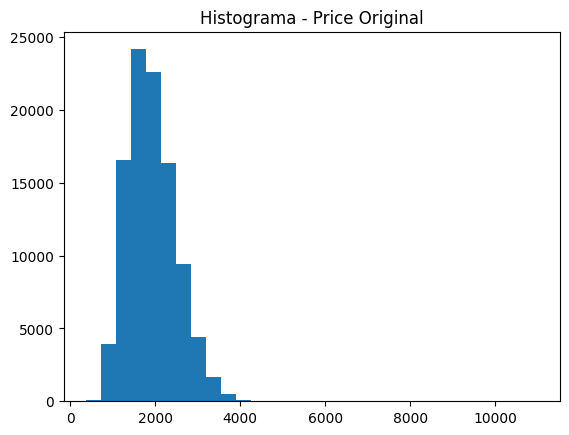

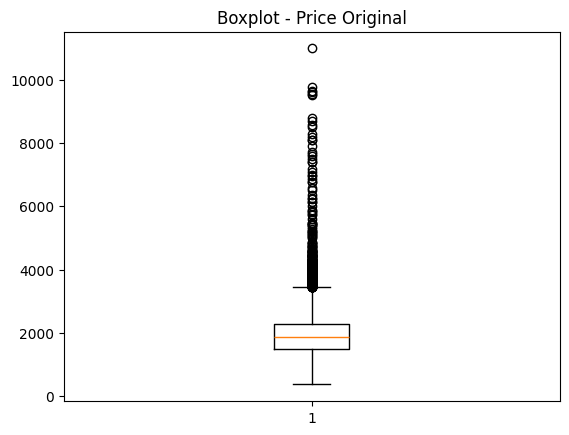

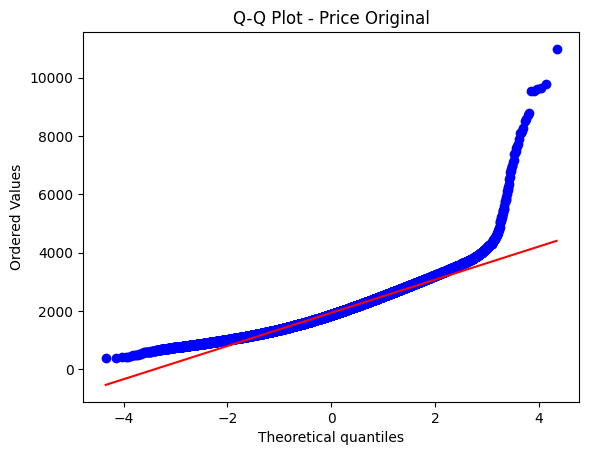

ANÁLISIS DE: Price Log
Skew: -0.13310304717875493
Cantidad de outliers: 386


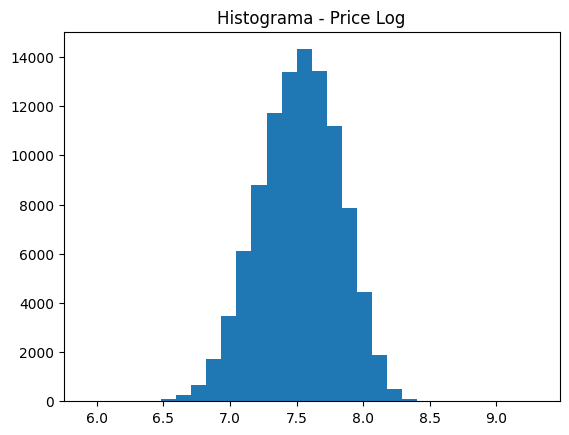

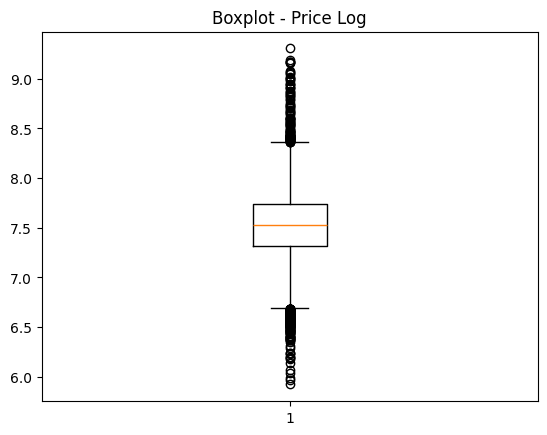

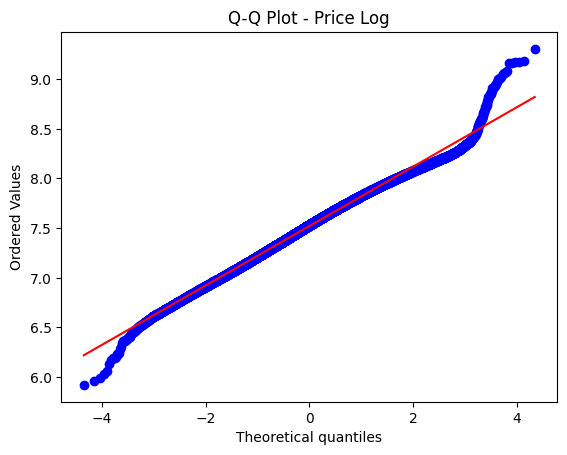

ANÁLISIS DE: Price Sqrt
Skew: 0.3322478296859819
Cantidad de outliers: 364


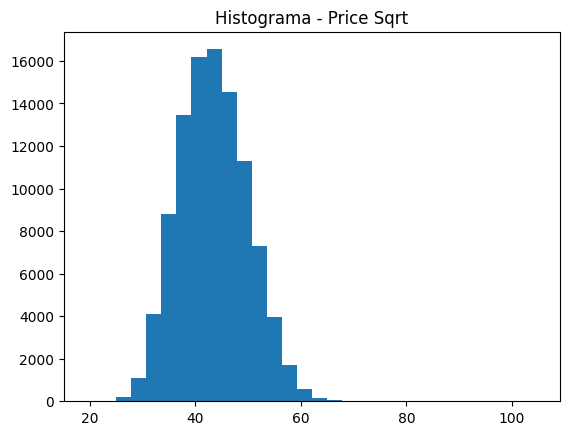

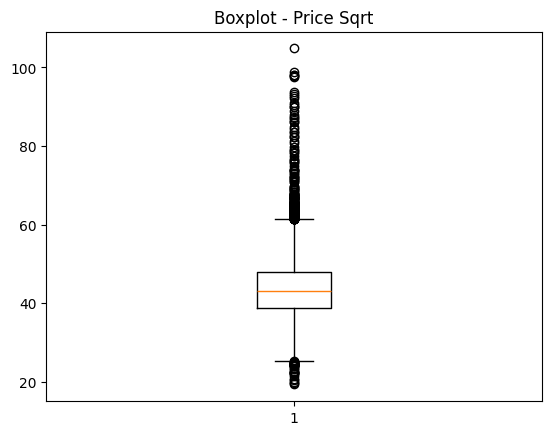

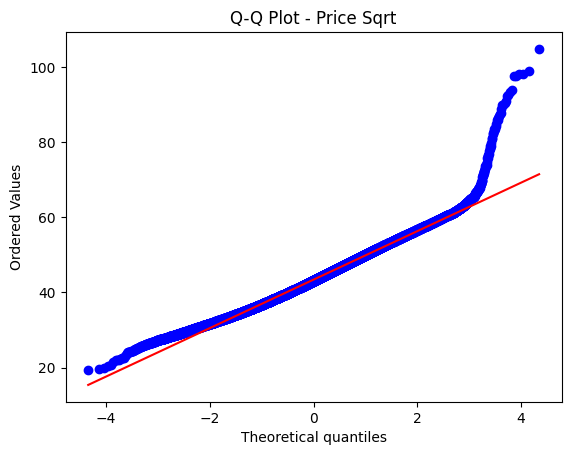

ANÁLISIS DE: Price Box-Cox
Skew: -0.00023827064005421808
Cantidad de outliers: 317


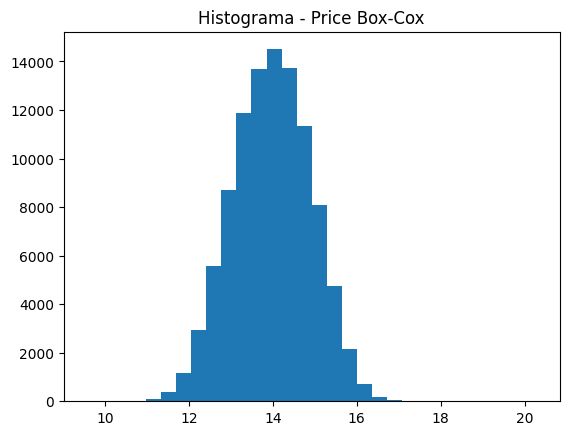

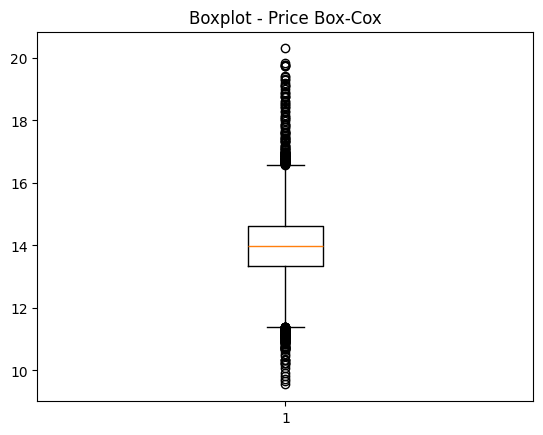

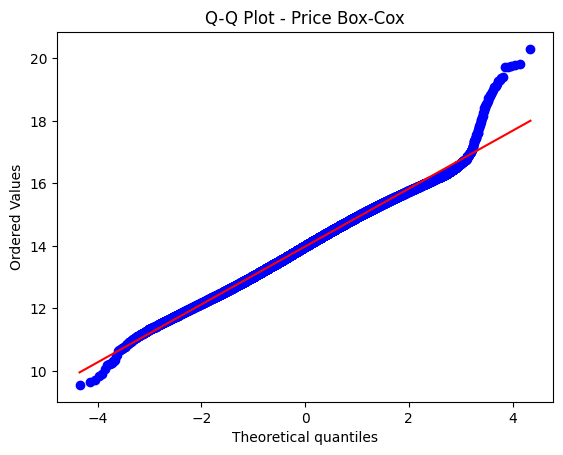

In [66]:
price_original = compu_df["price"]
price_log = np.log(price_original)
price_sqrt = np.sqrt(price_original)
price_boxcox, lambda_boxcox = stats.boxcox(price_original)

def analizar_variable(variable, nombre):

    print(f"ANÁLISIS DE: {nombre}")

    skew = stats.skew(variable)
    print("Skew:", skew)

    Q1 = np.percentile(variable, 25)
    Q3 = np.percentile(variable, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((variable < lower) | (variable > upper)).sum()
    print("Cantidad de outliers:", outliers)

    plt.figure()
    plt.hist(variable, bins=30)
    plt.title(f"Histograma - {nombre}")
    plt.show()

    plt.figure()
    plt.boxplot(variable)
    plt.title(f"Boxplot - {nombre}")
    plt.show()

    plt.figure()
    stats.probplot(variable, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot - {nombre}")
    plt.show()

analizar_variable(price_original, "Price Original")
analizar_variable(price_log, "Price Log")
analizar_variable(price_sqrt, "Price Sqrt")
analizar_variable(price_boxcox, "Price Box-Cox")

In [67]:
df = pd.read_csv("computer_prices.csv")
df.head()

df[["weight_kg", "psu_watts", "price"]].describe()
from scipy.stats import skew

print("Skew original:")
print("weight_kg:", skew(df["weight_kg"]))
print("psu_watts:", skew(df["psu_watts"]))
print("price:", skew(df["price"]))

df["weight_kg"] = np.log1p(df["weight_kg"])
df["psu_watts"] = np.log1p(df["psu_watts"])
df["price"] = np.log1p(df["price"])

print("Skew después de log:")
print("weight_kg:", skew(df["weight_kg"]))
print("psu_watts:", skew(df["psu_watts"]))
print("price:", skew(df["price"]))

Skew original:
weight_kg: 1.180884028534501
psu_watts: 0.7655200008129055
price: 0.9866291457617555
Skew después de log:
weight_kg: 0.6010920153268273
psu_watts: 0.41269723519163454
price: -0.1325990323912281


7. Para que todas las variables numéricas estén en la misma escala, aplica `MinMaxScaler` de sklearn a todas las columnas numéricas del dataframe, reemplazando las columnas originales.

In [68]:
from sklearn.preprocessing import MinMaxScaler

num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].describe()

,release_year,cpu_tier,cpu_cores,cpu_threads,gpu_tier,vram_gb,ram_gb,storage_gb,storage_drive_count,charger_watts,psu_watts,bluetooth,weight_kg,warranty_months,price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.617264,0.430698,0.271489,0.295629,0.398270,0.384511,0.233135,0.168733,0.174993,0.255764,0.366836,0.804331,0.361340,0.283343,0.472376
std,0.289394,0.274635,0.210171,0.186893,0.291929,0.247808,0.234579,0.201626,0.265761,0.261646,0.448657,0.223616,0.296803,0.284219,0.088567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.428571,0.200000,0.083333,0.153846,0.200000,0.250000,0.058824,0.066667,0.000000,0.000000,0.000000,0.727273,0.121036,0.000000,0.411909
50%,0.714286,0.400000,0.166667,0.230769,0.400000,0.375000,0.176471,0.066667,0.000000,0.270833,0.000000,0.818182,0.204635,0.333333,0.475359
75%,0.857143,0.600000,0.416667,0.384615,0.600000,0.500000,0.411765,0.200000,0.333333,0.375000,0.913636,0.909091,0.654374,0.333333,0.535964
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


8. Aunque `wifi` es una variable categórica, sus categorías tienen un orden natural (Wi-Fi 5 < Wi-Fi 6 < Wi-Fi 6E < Wi-Fi 7). Codifícala usando `OrdinalEncoder`.
* Luego, escala la variable codificada entre 0 y 1 con `MinMaxScaler`, para que quede en la misma escala que las variables numéricas del dataframe.

Nota: Ambos cambios deben efectuarse sobre la columna original, de manera que quede una única columna `wifi` con toda la información transformada.

In [69]:
compu_df = pd.read_csv("computer_prices.csv")

compu_df["wifi"].dtype
compu_df["wifi"].unique()

array(['Wi-Fi 6', 'Wi-Fi 5', 'Wi-Fi 6E', 'Wi-Fi 7'], dtype=object)

In [70]:
compu_df = pd.read_csv("computer_prices.csv")

orden_wifi = [["Wi-Fi 5", "Wi-Fi 6", "Wi-Fi 6E", "Wi-Fi 7"]]

encoder = OrdinalEncoder(categories=orden_wifi)
compu_df["wifi"] = encoder.fit_transform(compu_df[["wifi"]])

scaler = MinMaxScaler()
compu_df["wifi"] = scaler.fit_transform(compu_df[["wifi"]])

compu_df["wifi"].unique()

array([0.33333333, 0.        , 0.66666667, 1.        ])

9. La variable `gpu_model` tiene muchas categorías. Usar *One-Hot Encoding* aumentaría significativamente la dimensionalidad del dataframe. Por ello, utiliza `BinaryEncoder` para codificarla.
* Guarda el resultado en un dataframe llamado `bin_df`. Más adelante, lo combinarás con `compu_transf` para integrar las variables codificadas.

In [71]:
import category_encoders as ce

binary_encoder = ce.BinaryEncoder(cols=["gpu_model"])
bin_df = binary_encoder.fit_transform(compu_df[["gpu_model"]])

print(bin_df.head())


   gpu_model_0  gpu_model_1  gpu_model_2  gpu_model_3  gpu_model_4  \
0            0            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            1   
3            0            0            0            1            0   
4            0            0            0            1            0   

   gpu_model_5  
0            1  
1            0  
2            1  
3            0  
4            1  


In [72]:
compu_sin_gpu = compu_df.drop(columns=["gpu_model"])
compu_transf = pd.concat([compu_sin_gpu, bin_df], axis=1)

print(compu_transf.shape)
print(compu_transf.head())

(100000, 32)
  device_type     brand              model  release_year       os form_factor  \
0     Desktop   Samsung  Samsung Forge XDI          2022  Windows         ATX   
1      Laptop   Samsung    Samsung Pro KM8          2022  Windows  Mainstream   
2     Desktop    Lenovo   Lenovo Strix BIE          2024    macOS         SFF   
3     Desktop      Dell      Dell Cube AXR          2024  Windows         ATX   
4      Laptop  Gigabyte   Gigabyte Pro IX1          2024    Linux      Gaming   

  cpu_brand         cpu_model  cpu_tier  cpu_cores  ...  bluetooth weight_kg  \
0     Intel    Intel i5-11129         3         12  ...        5.1     11.00   
1     Intel    Intel i7-11114         4         12  ...        5.3      2.03   
2       AMD  AMD Ryzen 5 5168         2          8  ...        5.0      7.00   
3       AMD  AMD Ryzen 5 7550         2          6  ...        5.2      6.00   
4       AMD  AMD Ryzen 7 6230         5         16  ...        5.2      1.50   

   warranty_months 

10. Usa `OneHotEncoder` para codificar las variables categóricas restantes. Asegúrate de usar `drop='first'` para evitar la multicolinealidad y guarda el resultado en un dataframe llamado `ohe_df`
* Combina el dataframe `compu_transf` con las variables categóricas que fueron codificadas en `bin_df` y `ohe_df`. No olvides eliminar las variables originales.
* Usa `describe()` sobre el dataframe resultante para corroborar que todas las columnas estén escaladas entre 0 y 1 y que no queden variables categóricas sin codificar.

In [73]:
cat_cols = compu_transf.select_dtypes(include=["object"]).columns
cat_cols

compu_transf.describe()

print(compu_transf.describe().loc[['min','max']])

     release_year  cpu_tier  cpu_cores  cpu_threads  gpu_tier  vram_gb  \
min        2018.0       1.0        4.0          4.0       1.0      0.0   
max        2025.0       6.0       28.0         56.0       6.0     16.0   

     ram_gb  storage_gb  storage_drive_count  charger_watts  ...  bluetooth  \
min     8.0       256.0                  1.0            0.0  ...        4.2   
max   144.0      4096.0                  4.0          240.0  ...        5.3   

     weight_kg  warranty_months     price  gpu_model_0  gpu_model_1  \
min       0.92             12.0    372.99          0.0          0.0   
max      16.00             48.0  10984.99          1.0          1.0   

     gpu_model_2  gpu_model_3  gpu_model_4  gpu_model_5  
min          0.0          0.0          0.0          0.0  
max          1.0          1.0          1.0          1.0  

[2 rows x 22 columns]


In [74]:
from sklearn.preprocessing import MinMaxScaler

num_cols = compu_transf.select_dtypes(include=['float64','int64']).columns
scaler = MinMaxScaler()

compu_transf[num_cols] = scaler.fit_transform(compu_transf[num_cols])
compu_transf.describe().loc[['min','max']]

,release_year,cpu_tier,cpu_cores,cpu_threads,gpu_tier,vram_gb,ram_gb,storage_gb,storage_drive_count,charger_watts,...,bluetooth,weight_kg,warranty_months,price,gpu_model_0,gpu_model_1,gpu_model_2,gpu_model_3,gpu_model_4,gpu_model_5
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
